In [36]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [37]:
customers_file = '/content/Customers.csv'
products_file = '/content/Products.csv'
transactions_file = '/content/Transactions.csv'

In [38]:
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

In [39]:
print("Customers DataFrame:")
print(customers_df.head(), "\n")

print("Products DataFrame:")
print(products_df.head(), "\n")

print("Transactions DataFrame:")
print(transactions_df.head())

Customers DataFrame:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products DataFrame:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions DataFrame:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T

In [40]:
# Check for missing values
print("Missing Values in Customers:")
print(customers_df.isnull().sum(), "\n")

print("Missing Values in Products:")
print(products_df.isnull().sum(), "\n")

print("Missing Values in Transactions:")
print(transactions_df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows in Customers:", customers_df.duplicated().sum())
print("Duplicate Rows in Products:", products_df.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions_df.duplicated().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


In [41]:
customers_df.describe()



,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [42]:
products_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [43]:
transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


**BASIC ANALYSIS**

In [44]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [45]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [46]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [47]:
# Customer distribution by region
region_distribution = customers_df['Region'].value_counts()
print("Customer Distribution by Region:\n", region_distribution)

# Signup trends over time
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
signup_trends = customers_df['SignupDate'].dt.year.value_counts().sort_index()
print("\nSignup Trends over Time:\n", signup_trends)

# Top regions based on customer count
top_regions = region_distribution.head()
print("\nTop Regions Based on Customer Count:\n", top_regions)


Customer Distribution by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Signup Trends over Time:
 SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64

Top Regions Based on Customer Count:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [48]:
# Product categories and price distribution
category_distribution = products_df['Category'].value_counts()
print("Product Category Distribution:\n", category_distribution)

# Price distribution summary statistics
price_distribution = products_df['Price'].describe()
print("\nPrice Distribution:\n", price_distribution)

# Products with the highest price
most_expensive_products = products_df.sort_values(by='Price', ascending=False).head()
print("\nMost Expensive Products:\n", most_expensive_products[['ProductID', 'ProductName', 'Price']])

# Average price per category
avg_price_per_category = products_df.groupby('Category')['Price'].mean()
print("\nAverage Price per Category:\n", avg_price_per_category)


Product Category Distribution:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

Price Distribution:
 count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

Most Expensive Products:
    ProductID           ProductName   Price
74      P075      TechPro Textbook  497.76
31      P032    BookWorld Cookbook  488.63
44      P045     SoundWave T-Shirt  481.78
16      P017   ActiveWear Textbook  469.77
36      P037  SoundWave Smartwatch  459.86

Average Price per Category:
 Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64


In [49]:
# Revenue trends over time
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
revenue_trends = transactions_df.groupby('YearMonth')['TotalValue'].sum()
print("\nRevenue Trends Over Time:\n", revenue_trends)

# Peak transaction periods
peak_transaction_periods = transactions_df['YearMonth'].value_counts()
print("\nPeak Transaction Periods:\n", peak_transaction_periods)



Revenue Trends Over Time:
 YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

Peak Transaction Periods:
 YearMonth
2024-01    107
2024-09     96
2024-07     96
2024-08     94
2024-05     86
2024-04     86
2024-03     80
2024-12     78
2024-02     77
2024-10     70
2024-06     69
2024-11     57
2023-12      4
Freq: M, Name: count, dtype: int64


**BASIC OBSERVATIONS**

January and July 2024 saw the highest revenue ($66,376.39 and $71,366.39), suggesting seasonal or promotional spikes that should be leveraged.


2024 had the most signups (79), indicating strong customer acquisition that can be built upon.

January 2024 had the most transactions (107), with July and September close behind, highlighting key periods for future promotions.


Product prices range from $16.08 to $497.76, showing a mix of budget and premium products, allowing targeted marketing to different customer segments.

**CHECKING PAIRWISE RELATIONSHIPS**

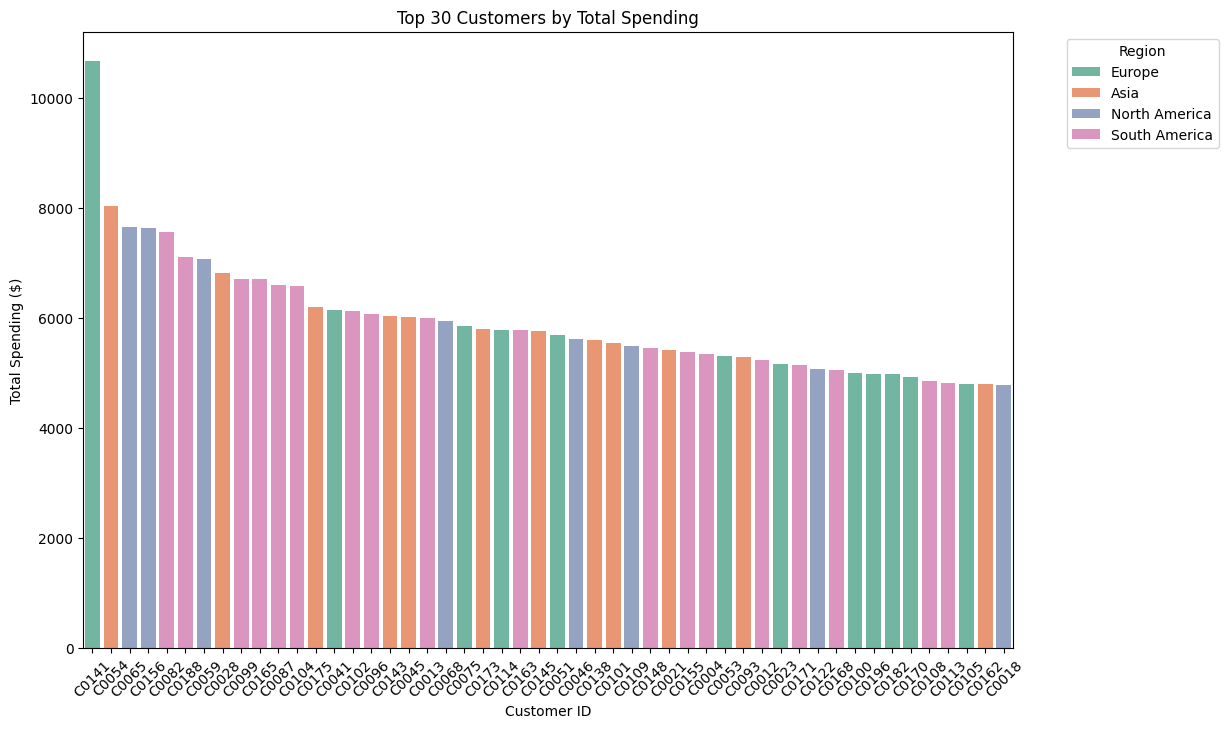

In [50]:
# Merge Customers and Transactions to calculate total spending per customer
customer_transactions = pd.merge(transactions_df, customers_df, on="CustomerID")

# Calculate total spending per customer
customer_spending = customer_transactions.groupby(['CustomerID', 'Region'])['TotalValue'].sum().reset_index()

# Get the top 30 customers by total spending (ignoring regions)
top_30_customers = customer_spending.nlargest(50, 'TotalValue')

# Plotting top 30 customers by spending with a different color for each region
plt.figure(figsize=(12, 8))
sns.set_palette("Set2")  # Choose a color palette with multiple distinct colors

sns.barplot(x='CustomerID', y='TotalValue', hue='Region', data=top_30_customers)
plt.title('Top 30 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [51]:
# Merge Customers and Transactions to calculate total spending per customer
customer_transactions = pd.merge(transactions_df, customers_df, on="CustomerID")

# Calculate total spending per customer
customer_spending = customer_transactions.groupby(['CustomerID', 'Region'])['TotalValue'].sum().reset_index()

# Calculate the average spending per region
average_spending_per_region = customer_spending.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

# Display the average spending by region
print("Average spending per region:\n", average_spending_per_region)


Average spending per region:
 Region
South America    3717.840000
Asia             3456.249318
Europe           3325.092600
North America    3311.160870
Name: TotalValue, dtype: float64



Total spending by region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


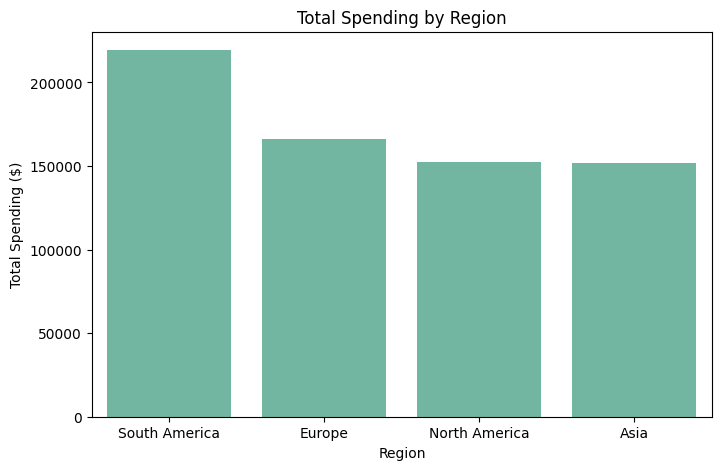

In [52]:
# Analyze transaction patterns by region
region_spending = customer_transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal spending by region:\n", region_spending)

# Plotting spending by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_spending.index, y=region_spending.values)
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending ($)')
plt.show()

On avg each customer is spending:

South America    3917.65

Europe           3325.45

North America    3311.94

Asia             3379.46

Columns in product_transactions after renaming: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'YearMonth', 'ProductPrice',
       'Category'],
      dtype='object')


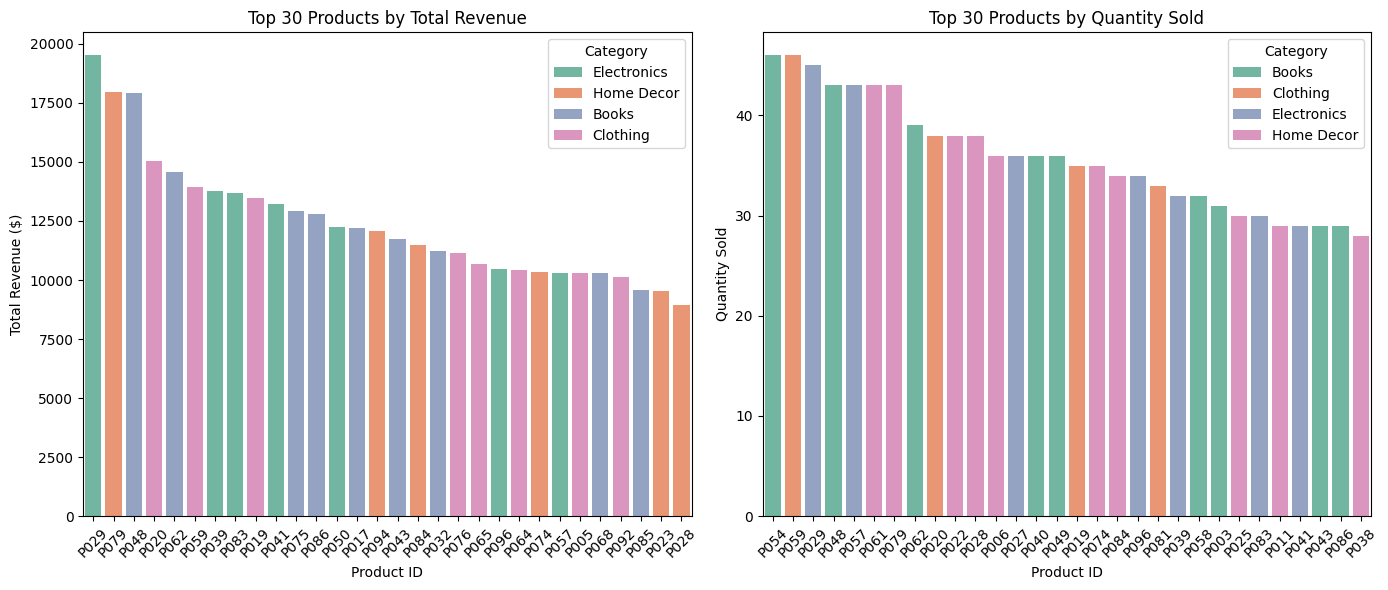

In [53]:
# Merge Products and Transactions to ensure 'Price' column is included correctly
product_transactions = pd.merge(transactions_df, products_df[['ProductID', 'Price', 'Category']], on="ProductID", how='left')

# Rename the Price_y column to 'ProductPrice' to avoid confusion
product_transactions.rename(columns={'Price_y': 'ProductPrice'}, inplace=True)

# Check if 'ProductPrice' is included after merge
print("Columns in product_transactions after renaming:", product_transactions.columns)

# Calculate total revenue and quantity sold for each product
product_revenue = product_transactions.groupby(['ProductID', 'Category'])['TotalValue'].sum().reset_index()
product_quantity = product_transactions.groupby(['ProductID', 'Category'])['Quantity'].sum().reset_index()

# Get the top 30 products by total revenue
top_30_revenue = product_revenue.nlargest(30, 'TotalValue')

# Get the top 30 products by quantity sold
top_30_quantity = product_quantity.nlargest(30, 'Quantity')

# Plotting top 30 products by total revenue and quantity sold, with unique colors for each category
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Total Revenue per Product with color based on Category
sns.barplot(x='ProductID', y='TotalValue', hue='Category', data=top_30_revenue, ax=ax[0])
ax[0].set_title('Top 30 Products by Total Revenue')
ax[0].set_xlabel('Product ID')
ax[0].set_ylabel('Total Revenue ($)')
ax[0].tick_params(axis='x', rotation=45)

# Quantity Sold per Product with color based on Category
sns.barplot(x='ProductID', y='Quantity', hue='Category', data=top_30_quantity, ax=ax[1])
ax[1].set_title('Top 30 Products by Quantity Sold')
ax[1].set_xlabel('Product ID')
ax[1].set_ylabel('Quantity Sold')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


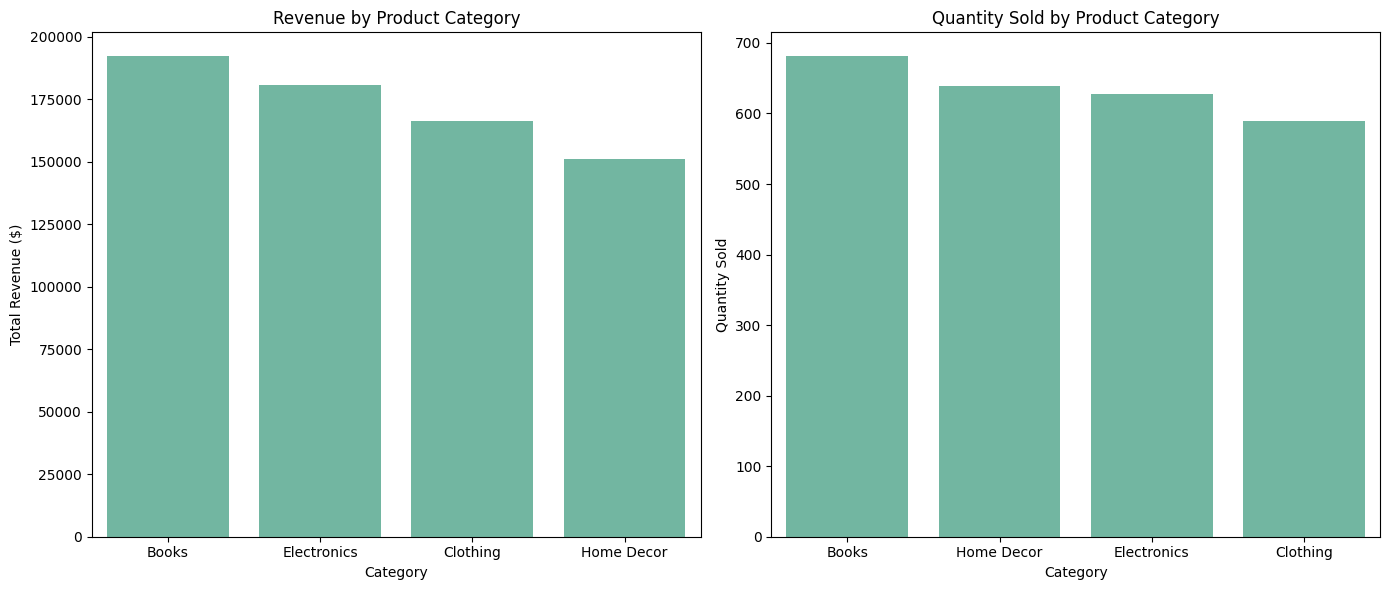

In [54]:
# Calculate revenue and quantity sold per product category
category_revenue = product_transactions.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_quantity = product_transactions.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

# Plotting revenue and quantity sold by category
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Revenue per Category
sns.barplot(x=category_revenue.index, y=category_revenue.values, ax=ax[0])
ax[0].set_title('Revenue by Product Category')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Total Revenue ($)')

# Quantity Sold per Category
sns.barplot(x=category_quantity.index, y=category_quantity.values, ax=ax[1])
ax[1].set_title('Quantity Sold by Product Category')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Quantity Sold')

plt.tight_layout()
plt.show()

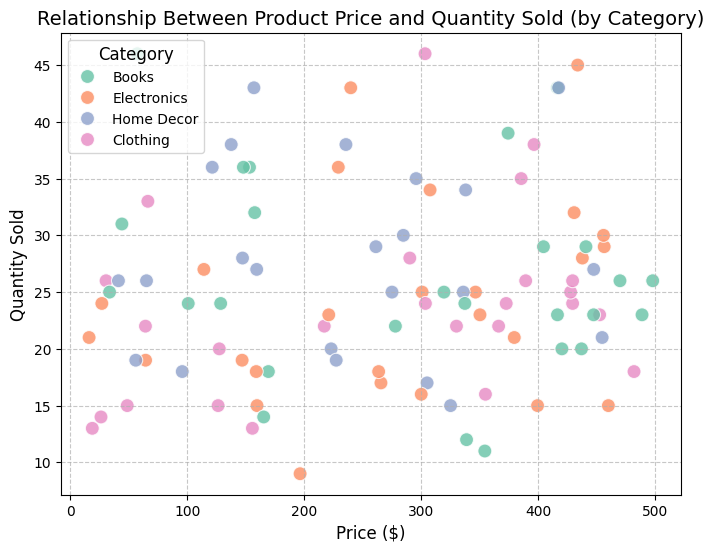

In [55]:
# Ensure that 'Category' is included in the product_transactions dataframe for color coding
product_sales = product_transactions.groupby(['ProductID', 'Category']).agg({'ProductPrice': 'mean', 'Quantity': 'sum'}).reset_index()

# Scatter plot with category-based coloring
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=product_sales,
    x='ProductPrice',
    y='Quantity',
    hue='Category',
    palette='Set2',  # Use a color palette for better visualization
    s=100,  # Size of the scatter points
    alpha=0.8  # Transparency for better visibility
)

# Customize plot aesthetics
plt.title('Relationship Between Product Price and Quantity Sold (by Category)', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Category', fontsize=10, title_fontsize=12)  # Improve legend formatting
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Checking relationships by Merging**

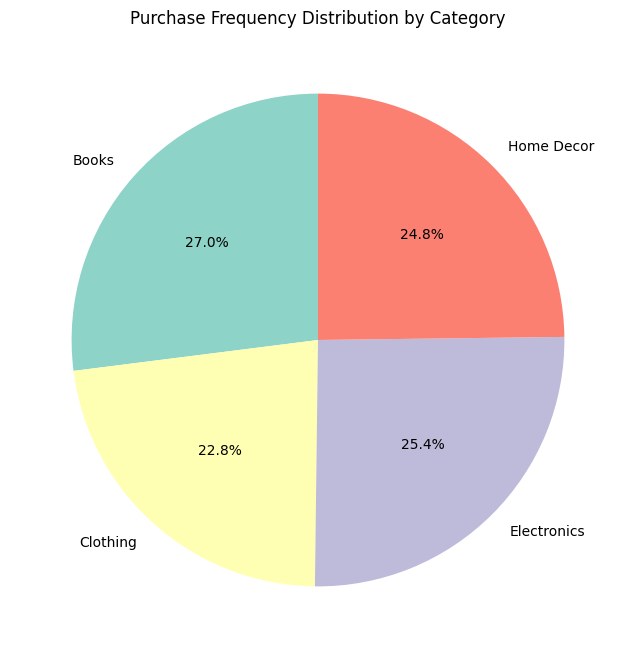

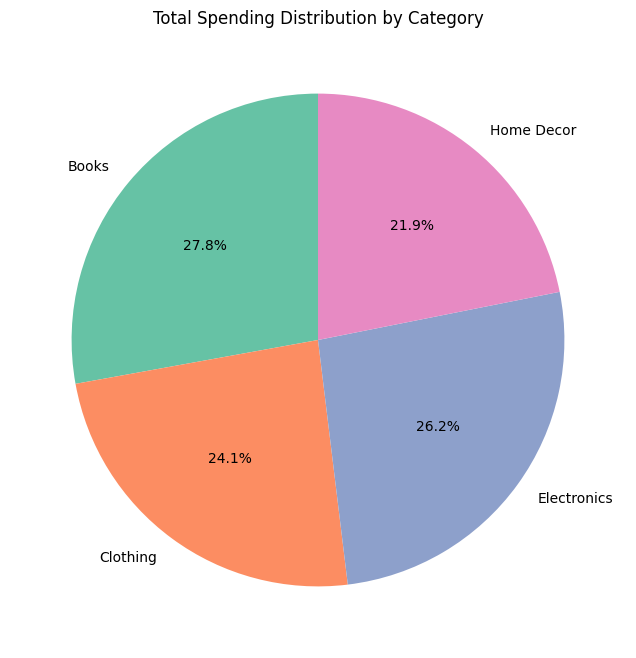

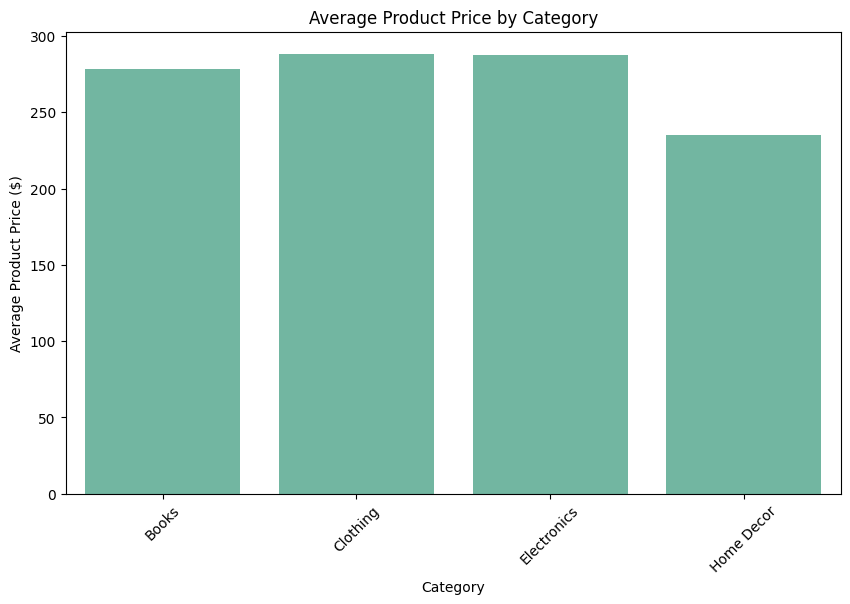

In [101]:
# 1. Pie Chart for Purchase Frequency by Category
# Calculate the total purchase frequency for each category
purchase_frequency_by_category = customer_product_transactions.groupby('Category')['ProductID'].count().reset_index(name='PurchaseFrequency')

# Plot: Pie chart for purchase frequency by category
plt.figure(figsize=(8, 8))
# Use 'Set3' palette for colors
colors = sns.color_palette('Set3', len(purchase_frequency_by_category))

plt.pie(purchase_frequency_by_category['PurchaseFrequency'], labels=purchase_frequency_by_category['Category'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Purchase Frequency Distribution by Category")
plt.show()

# 2. Pie Chart for Total Spending by Category
# Calculate the total spending for each category
total_spending_by_category = customer_product_transactions.groupby('Category')['TotalValue'].sum().reset_index()

# Plot: Pie chart for total spending by category
plt.figure(figsize=(8, 8))
# Use 'Set2' palette for colors
colors = sns.color_palette('Set2', len(total_spending_by_category))

plt.pie(total_spending_by_category['TotalValue'], labels=total_spending_by_category['Category'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Total Spending Distribution by Category")
plt.show()

# 3. Bar plot: Average product price by category (unchanged)
avg_price_by_category = average_product_price_by_customer_category.groupby('Category')['ProductPrice'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='ProductPrice', data=avg_price_by_category)
plt.title('Average Product Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Product Price ($)')
plt.xticks(rotation=45)
plt.show()


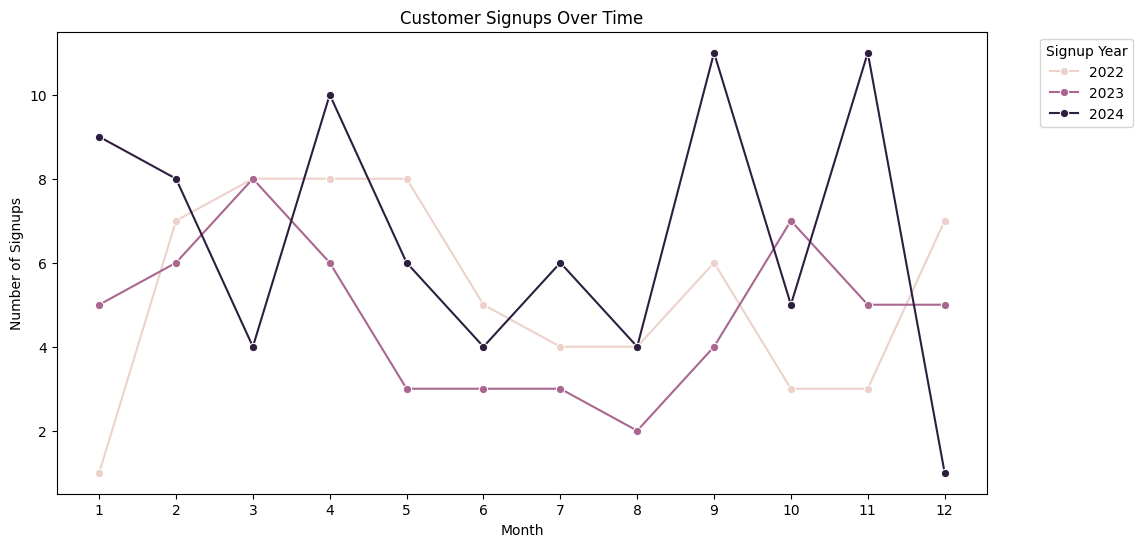

<ipython-input-95-a821c142ed09>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=signup_by_region, x='Region', y='CustomerID', palette='viridis')


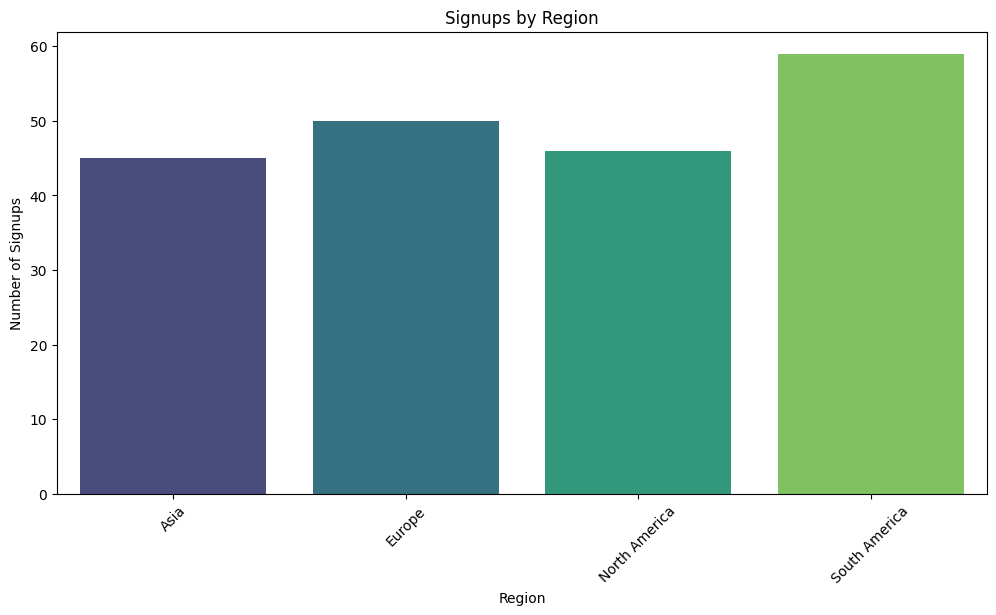

Conversion Rate (Signup to First Purchase): 500.00%


In [95]:
# 1. Signup Trends Over Time
# Group by year and month to track signups over time
signup_trends = customers_df.groupby(['SignupYear', 'SignupMonth'])['CustomerID'].count().reset_index()

# Plot: Number of signups over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=signup_trends, x='SignupMonth', y='CustomerID', hue='SignupYear', marker='o')
plt.title("Customer Signups Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.xticks(range(1, 13))
plt.legend(title="Signup Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Signups by Region
# Group by region to see how signups are distributed across different regions
signup_by_region = customers_df.groupby('Region')['CustomerID'].count().reset_index()

# Plot: Signups by Region
plt.figure(figsize=(12, 6))
sns.barplot(data=signup_by_region, x='Region', y='CustomerID', palette='viridis')
plt.title("Signups by Region")
plt.xlabel("Region")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()

# 3. Conversion Rate Analysis (If Purchase Data is Available)
# Assuming 'transactions_df' has data for purchases, calculate the conversion rate from signups to first-time purchases.
# First-time purchasers are customers who made their first purchase after signing up.

# Merge signups with transactions to see if signups led to purchases
first_time_purchasers = pd.merge(customers_df, transactions_df[['CustomerID', 'TransactionID']], on='CustomerID', how='left')
first_time_purchasers = first_time_purchasers[first_time_purchasers['TransactionID'].notna()]

# Calculate conversion rate
conversion_rate = len(first_time_purchasers) / len(customers_df) * 100

# Print conversion rate
print(f"Conversion Rate (Signup to First Purchase): {conversion_rate:.2f}%")


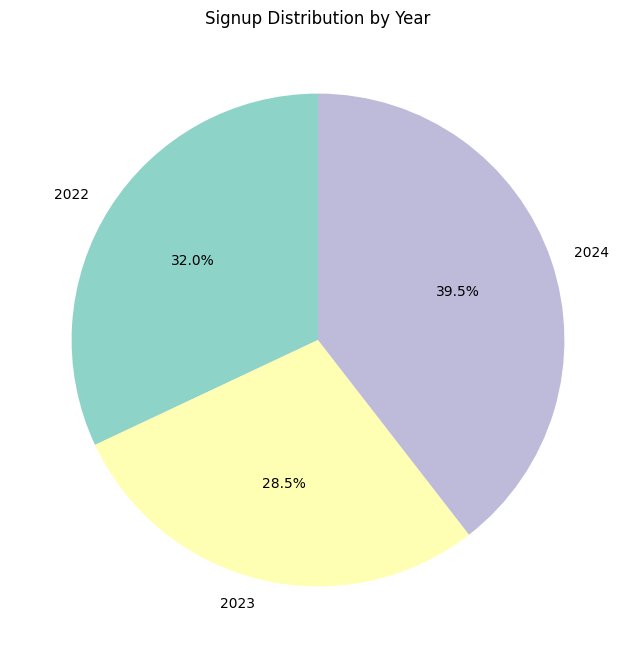

In [98]:
# 1. Signups Per Year
# Group by year to calculate the number of signups per year
yearly_signups = customers_df.groupby('SignupYear')['CustomerID'].count().reset_index()

# Plot: Pie chart for yearly signups distribution
plt.figure(figsize=(8, 8))

# Use a color palette from Seaborn (e.g., 'Set3') for the pie chart
colors = sns.color_palette('Set3', len(yearly_signups))

plt.pie(yearly_signups['CustomerID'], labels=yearly_signups['SignupYear'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Signup Distribution by Year")
plt.show()


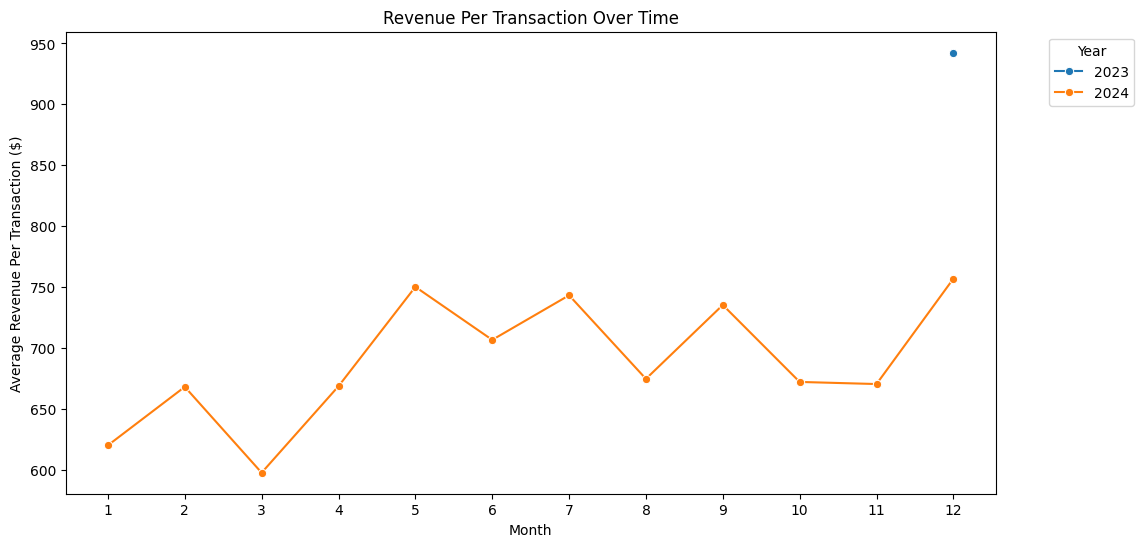

<ipython-input-66-4474be85e14b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_monthly_revenue, x="Month", y="TotalValue", palette="Blues_d")


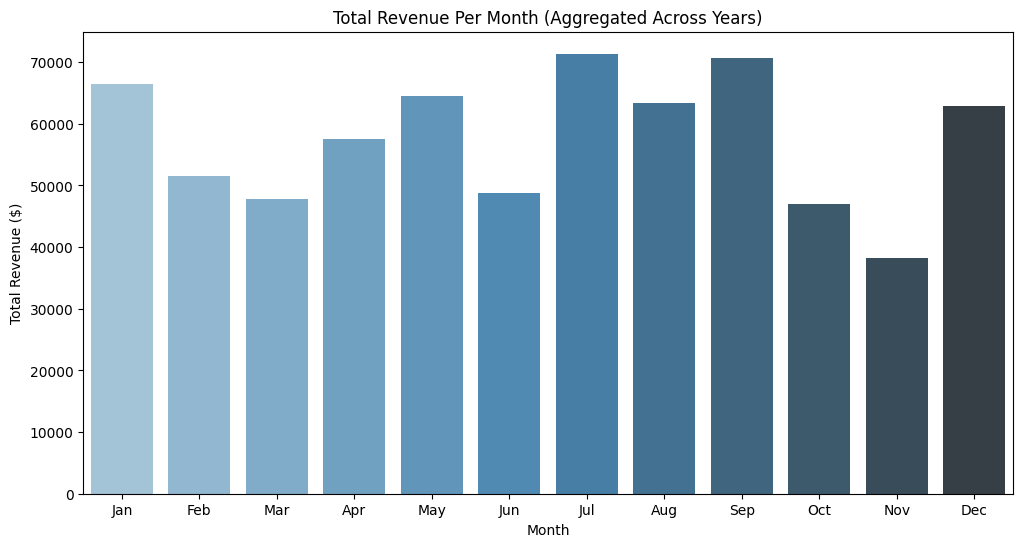

<ipython-input-66-4474be85e14b>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_monthly_transactions, x="Month", y="TransactionID", palette="Greens_d")


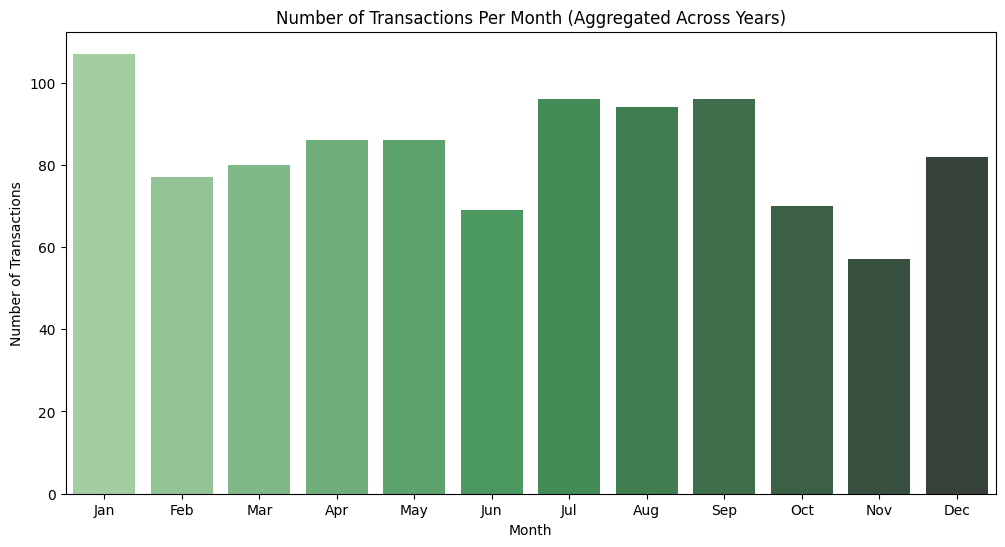

In [66]:
# 4. Revenue Per Transaction Over Time
monthly_revenue_transactions["RevenuePerTransaction"] = (
    monthly_revenue_transactions["TotalValue"] / monthly_revenue_transactions["TransactionID"]
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_revenue_transactions,
    x="Month",
    y="RevenuePerTransaction",
    hue="Year",
    marker="o",
    palette="tab10",
)
plt.title("Revenue Per Transaction Over Time")
plt.xlabel("Month")
plt.ylabel("Average Revenue Per Transaction ($)")
plt.xticks(range(1, 13))
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Total Revenue Per Month (Aggregated Across Years)
total_monthly_revenue = monthly_revenue.groupby("Month")["TotalValue"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=total_monthly_revenue, x="Month", y="TotalValue", palette="Blues_d")
plt.title("Total Revenue Per Month (Aggregated Across Years)")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

# Number of Transactions Per Month (Aggregated Across Years)
total_monthly_transactions = monthly_transactions.groupby("Month")["TransactionID"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=total_monthly_transactions, x="Month", y="TransactionID", palette="Greens_d")
plt.title("Number of Transactions Per Month (Aggregated Across Years)")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x YearMonth  Year  Month  Day  Price_y  
0      300.68   300.68   2024-08  2024      8   25   300.68  
1      300.68   300.68   2024-05  2024      5   27   300.68  
2      300.68   300.68   2024-04  2024      4   25   300.68  
3      601.36   300.68   2024-03  2024      3   26   300.68  
4      902.04   300.68   2024-03  2024      3   21   300.68  


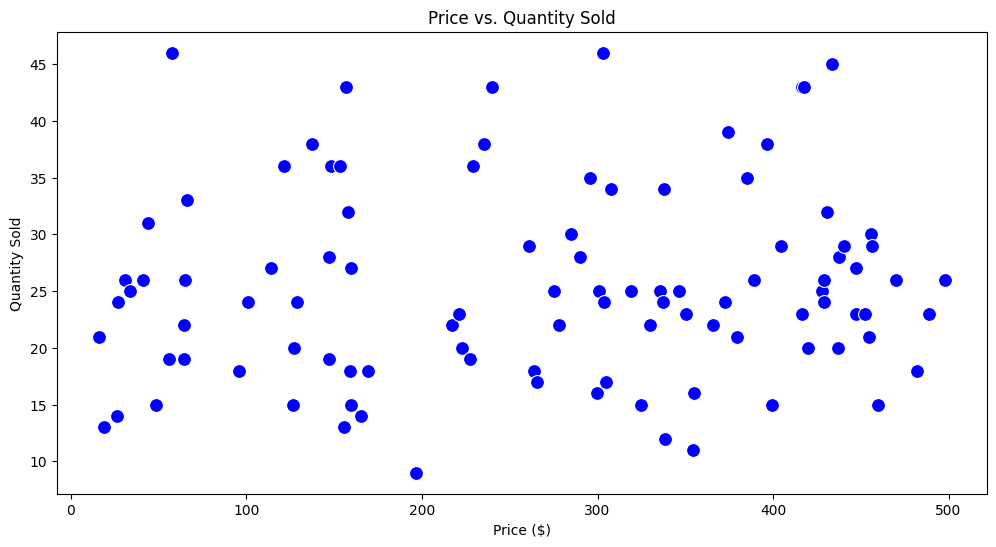

In [77]:
# Merge transactions and products to include 'Price' from products
price_quantity_relation = pd.merge(transactions_df, products_df[['ProductID', 'Price']], on='ProductID', how='left')

# Print the first few rows to debug the merge (already shown, but added again for clarity)
print(price_quantity_relation.head())  # Debugging step: Check the merged data

# Group by 'Price_y' (from products_df) for analyzing price vs quantity sold
# Use 'Price_y' as the price column since it comes from products_df
price_quantity_relation = price_quantity_relation.groupby('Price_y')['Quantity'].sum().reset_index()

# Rename 'Price_y' to 'Price' for clarity
price_quantity_relation.rename(columns={'Price_y': 'Price'}, inplace=True)

# Plot: Price vs. Quantity Sold
plt.figure(figsize=(12, 6))
sns.scatterplot(data=price_quantity_relation, x='Price', y='Quantity', color='blue', s=100)
plt.title("Price vs. Quantity Sold")
plt.xlabel("Price ($)")
plt.ylabel("Quantity Sold")
plt.show()


<ipython-input-92-f35fc19f8948>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_quantity_binned = price_quantity_relation.groupby('PriceRange')['Quantity'].sum().reset_index()
<ipython-input-92-f35fc19f8948>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_quantity_binned, x='PriceRange', y='Quantity', palette='viridis')


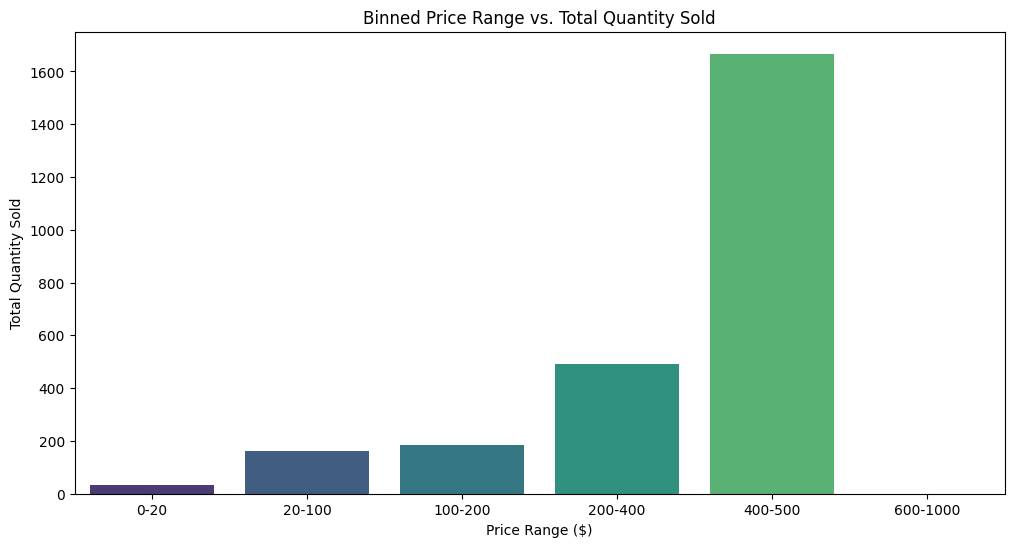

In [92]:


price_quantity_relation['PriceRange'] = pd.cut(price_quantity_relation['Price'], bins=price_bins, labels=price_labels)

# Group by PriceRange and sum the quantities sold for each price range
price_quantity_binned = price_quantity_relation.groupby('PriceRange')['Quantity'].sum().reset_index()

# Plot: Binned Price vs. Quantity Sold
plt.figure(figsize=(12, 6))
sns.barplot(data=price_quantity_binned, x='PriceRange', y='Quantity', palette='viridis')
plt.title("Binned Price Range vs. Total Quantity Sold")
plt.xlabel("Price Range ($)")
plt.ylabel("Total Quantity Sold")
plt.show()


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'YearMonth', 'Year', 'Month',
       'Day', 'Price_y'],
      dtype='object')
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x YearMonth  Year  Month  Day  Price_y  
0      300.68   300.68   2024-08  2024      8   25   300.68  
1      300.68   300.68   2024-05  2024      5   27   300.68  
2      300.68   300.68   2024-04  2024      4   25   300.68  
3      601.36   300.68   2024-03  2024      3   26   300.68  
4      902.04   300.68   2024-03  2024      3   21   300.68  


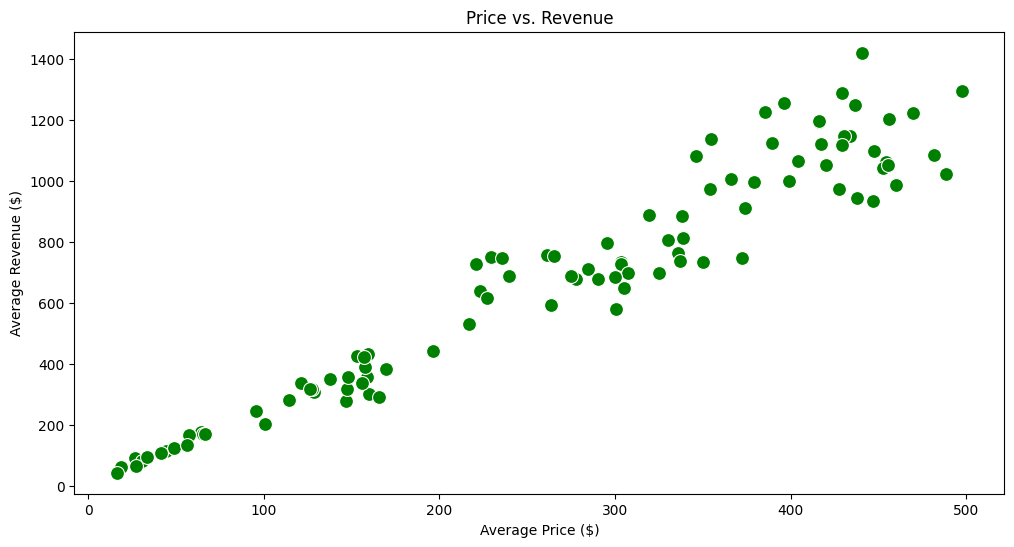

In [93]:
# Merge transactions with products to include 'Price' from products
price_revenue_relation = pd.merge(transactions_df, products_df[['ProductID', 'Price']], on='ProductID', how='left')

# Print the columns to check if 'Price' exists as 'Price_y'
print(price_revenue_relation.columns)  # This should show 'Price_y'

# Check the first few rows of the merged DataFrame to confirm column names
print(price_revenue_relation.head())  # This should show 'Price_y'

# Now, try using 'Price_y' directly in the code
# Calculate revenue for each product
price_revenue_relation['Revenue'] = price_revenue_relation['Price_y'] * price_revenue_relation['Quantity']

# Group by ProductID and calculate average Price and Revenue
price_revenue_relation = price_revenue_relation.groupby('ProductID')[['Price_y', 'Revenue']].mean().reset_index()

# Plot: Price vs. Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=price_revenue_relation, x='Price_y', y='Revenue', color='green', s=100)
plt.title("Price vs. Revenue")
plt.xlabel("Average Price ($)")
plt.ylabel("Average Revenue ($)")
plt.show()


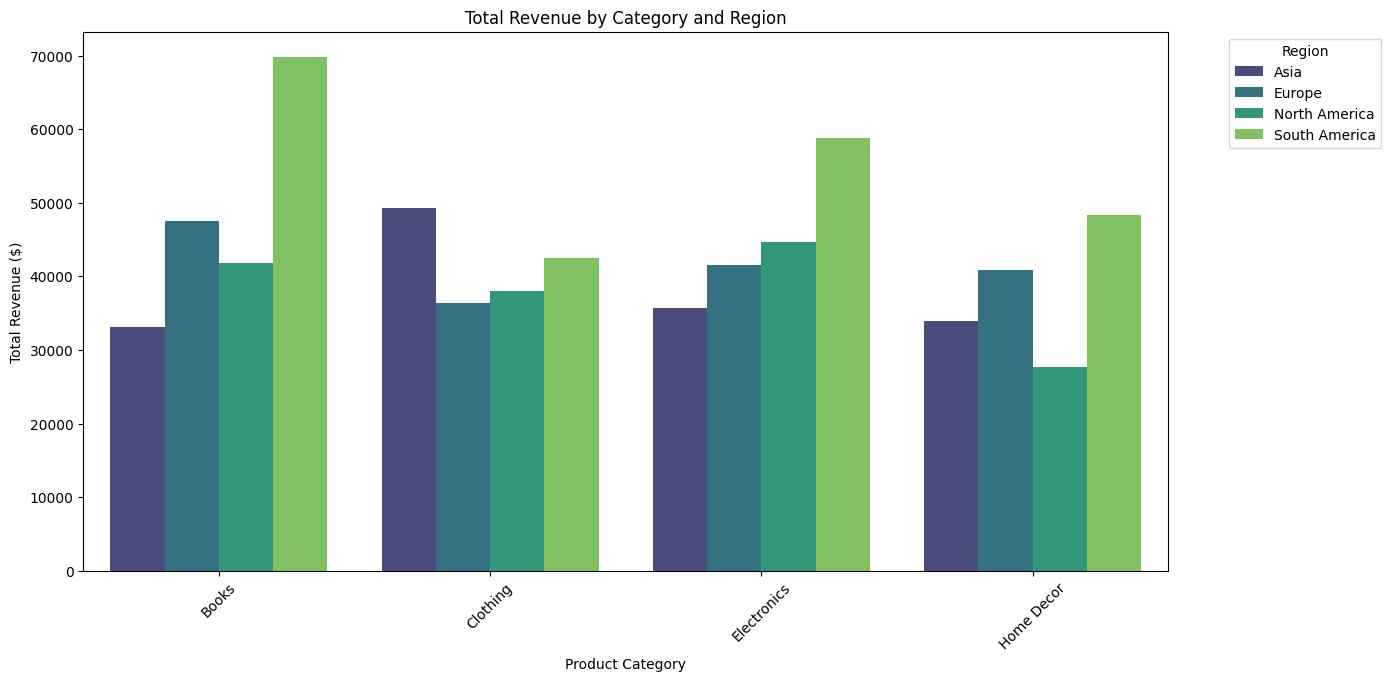

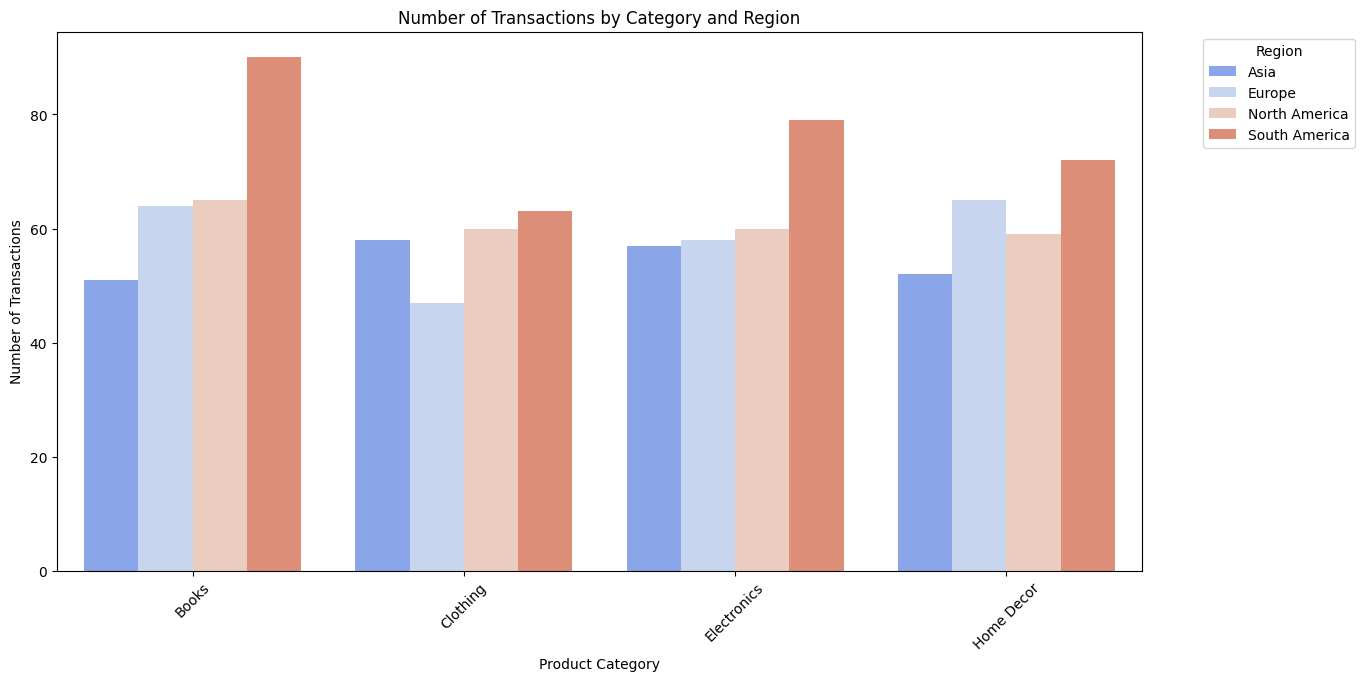

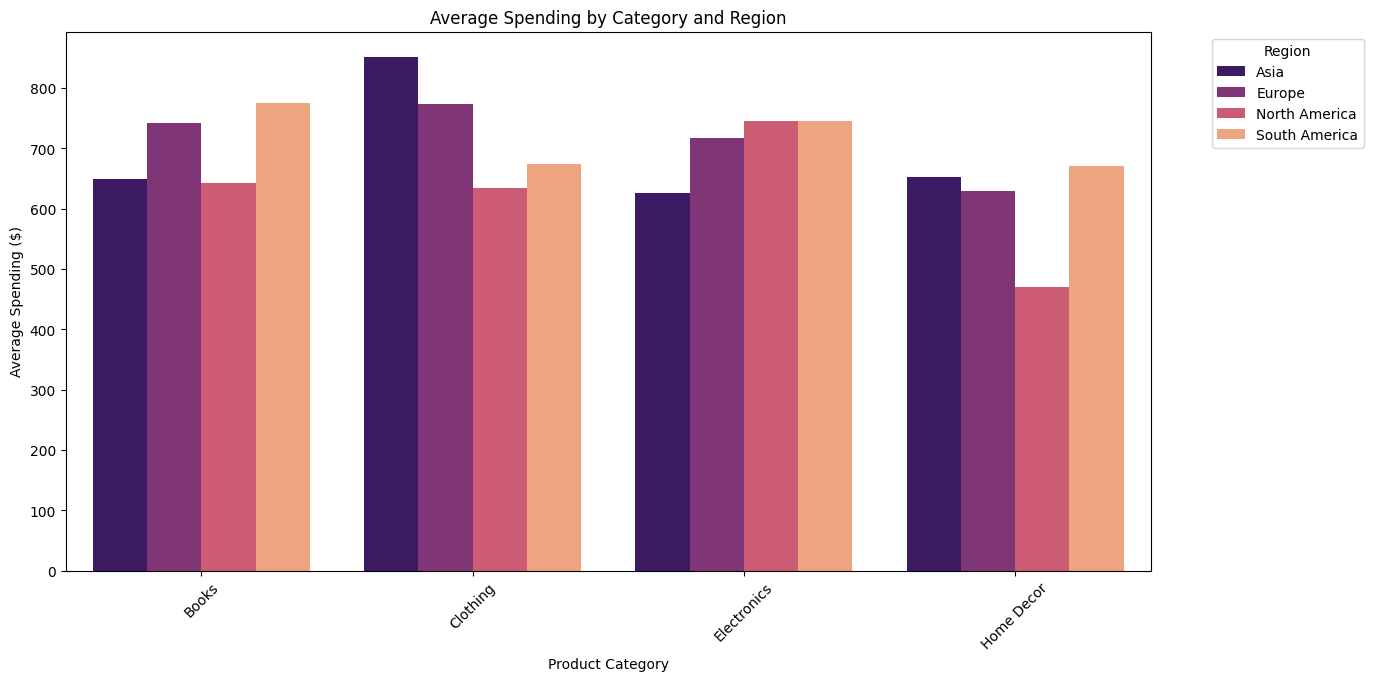

In [94]:
# Merge transactions with products and customers to include 'Category' and 'Region'
category_region_data = pd.merge(transactions_df, products_df[['ProductID', 'Category']], on='ProductID', how='left')
category_region_data = pd.merge(category_region_data, customers_df[['CustomerID', 'Region']], on='CustomerID', how='left')

# 1. Total Revenue by Category and Region
category_region_revenue = category_region_data.groupby(['Category', 'Region'])['TotalValue'].sum().reset_index()

# Plot: Total Revenue by Category and Region
plt.figure(figsize=(14, 7))
sns.barplot(data=category_region_revenue, x='Category', y='TotalValue', hue='Region', palette='viridis')
plt.title("Total Revenue by Category and Region")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Number of Transactions by Category and Region
category_region_transactions = category_region_data.groupby(['Category', 'Region'])['TransactionID'].count().reset_index()

# Plot: Number of Transactions by Category and Region
plt.figure(figsize=(14, 7))
sns.barplot(data=category_region_transactions, x='Category', y='TransactionID', hue='Region', palette='coolwarm')
plt.title("Number of Transactions by Category and Region")
plt.xlabel("Product Category")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Average Spending by Category and Region
category_region_avg_spending = category_region_data.groupby(['Category', 'Region'])['TotalValue'].mean().reset_index()

# Plot: Average Spending by Category and Region
plt.figure(figsize=(14, 7))
sns.barplot(data=category_region_avg_spending, x='Category', y='TotalValue', hue='Region', palette='magma')
plt.title("Average Spending by Category and Region")
plt.xlabel("Product Category")
plt.ylabel("Average Spending ($)")
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**KEY OBSERVATIONS**



1.Significant Seasonal Trends in Revenue and Transactions.

2.High Price Range Sales Drive Bulk of Transactions and Revenue.

3.Optimizing Pricing and Regional Strategy for Home Decor.

4.Significant Regional Spending Patterns.

5.High Transaction Volume in January, But Low Average Revenue per Transaction.